<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/ProyectoProgADAP_263162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Factores de riesgo de la hipertension
## Grupo: B
## Autor: Alejandra Margarita Rivas Simental
## Matrícula: 263162
## Fecha: 9/10/2025

# **1. Introducción**

## - Descripción del problema: En México, más de 30 millones de personas padecen hipertensión arterial: Secretaría de Salud. Con este proyecto queremos predecir el riesgo que tiene una persona de desarrollar hipertensión de acuerdo a su estilo de vida.
## - Objetivo del análisis: Predecir el riesgo que tiene una persona de desarrollar hipertensión de acuerdo a su estilo de vida.
## - Fuente de datos: ¿De dónde provienen los datos? Utilizaremos un csv llamado Hypertension-dataset que sacamos de la página de Kaggle
 https://www.kaggle.com/datasets/sumedh1507/hypertension-dataset


# **2. Captura y Carga de Datos**

## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
###Fuente: Kaggle -  Hypertension Dataset, el archivo es un CSV
###Cantidad de Filas: 1985
###Cantidad de columnas: 11
###Variables incluidas:
* Edad
* Consumo de sal
* Nivel de estrés
* Historial de presión arterial
* Duración del sueño
* Indice de masa corporal (IMC)
* Medicación
* Historial Familiar
* Nivel de ejercicio
* Estado de fumador
* Diagnostico de hipertensión
## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)

### Para La carga de datos usamos la libreria de pandas y la cargamos desde drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


#**3.Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos
## - Cantidad de Valores nulos
##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

##Métricas de calidad de los datos
*	Completitud
*	Consistencia: tipos de datos correctos, formatos esperados.
*	Unicidad: duplicados.
* Validez: rangos adecuados.


In [4]:
print('Tipo de dato: ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
Tipo de dato:  None


In [5]:
print('Valores unicos en la columna BP_History: ', df['BP_History'].unique())
print('\nConteo de valores unicos en cada categoría',df['BP_History'].value_counts())

Valores unicos en la columna BP_History:  ['Normal' 'Hypertension' 'Prehypertension']

Conteo de valores unicos en cada categoría BP_History
Normal             796
Prehypertension    620
Hypertension       569
Name: count, dtype: int64


In [6]:
print('Valores unicos en la columna Medication: ', df['Medication'].unique())
print('\nConteo de valores unicos en cada categoría',df['Medication'].value_counts())

Valores unicos en la columna Medication:  [nan 'ACE Inhibitor' 'Other' 'Beta Blocker' 'Diuretic']

Conteo de valores unicos en cada categoría Medication
Beta Blocker     412
ACE Inhibitor    323
Diuretic         245
Other            206
Name: count, dtype: int64


In [7]:
duplicados = df.duplicated().sum()
print("Datos duplicados", duplicados)

Datos duplicados 0


In [8]:
completitud = df.isnull().sum()
total_records = len(df)
com_porcentaje = (1 - completitud/total_records) * 100
print('Verificacion de completitud')
print(completitud)
print("Porcentaje de completitud")
print(com_porcentaje)

Verificacion de completitud
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64
Porcentaje de completitud
Age                 100.000000
Salt_Intake         100.000000
Stress_Score        100.000000
BP_History          100.000000
Sleep_Duration      100.000000
BMI                 100.000000
Medication           59.748111
Family_History      100.000000
Exercise_Level      100.000000
Smoking_Status      100.000000
Has_Hypertension    100.000000
dtype: float64


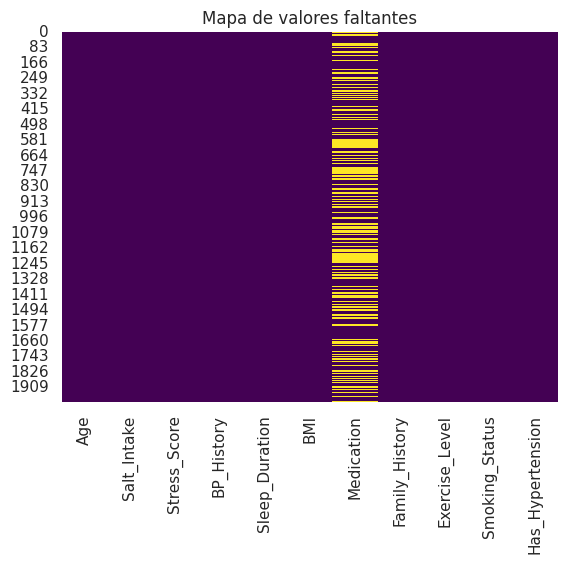

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores faltantes')
plt.show()

In [10]:
categorical_cols = ['BP_History', 'Medication', 'Family_History',
                    'Exercise_Level', 'Smoking_Status', 'Has_Hypertension']

for col in categorical_cols:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1985 non-null   int64   
 1   Salt_Intake       1985 non-null   float64 
 2   Stress_Score      1985 non-null   int64   
 3   BP_History        1985 non-null   category
 4   Sleep_Duration    1985 non-null   float64 
 5   BMI               1985 non-null   float64 
 6   Medication        1186 non-null   category
 7   Family_History    1985 non-null   category
 8   Exercise_Level    1985 non-null   category
 9   Smoking_Status    1985 non-null   category
 10  Has_Hypertension  1985 non-null   category
dtypes: category(6), float64(3), int64(2)
memory usage: 90.1 KB
None


In [11]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD


*   ¿Existe una relación entre el índice de masa corporal (IMC) y y el tener hipertensión?
*   ¿Cuál es la distribución de edad de los pacientes y cómo se relaciona con el diagnóstico?
*   ¿Existe una correlación entre la duración del sueño y el nivel de estre?



## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas

In [12]:
import numpy as np

# Estadísticas descriptivas
print('El EDA de los datos es: ')
print(df.describe())
print('\n')

#Obtenemos la moda de cada una de las columnas(el describe no la ofrece por si sola)
# Obtener la moda de cada columna
moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas

# Mostrar la moda de cada columna
print("Moda de cada columna:")
print(moda)
print('\n')

# Verificar valores faltantes
print("Valores faltantes:")
print(df.isnull().sum())

El EDA de los datos es: 
               Age  Salt_Intake  Stress_Score  Sleep_Duration          BMI
count  1985.000000  1985.000000   1985.000000     1985.000000  1985.000000
mean     50.341058     8.531688      4.979345        6.452242    26.015315
std      19.442042     1.994907      3.142303        1.542207     4.512857
min      18.000000     2.500000      0.000000        1.500000    11.900000
25%      34.000000     7.200000      2.000000        5.400000    23.000000
50%      50.000000     8.500000      5.000000        6.500000    25.900000
75%      67.000000     9.900000      8.000000        7.500000    29.100000
max      84.000000    16.400000     10.000000       11.400000    41.900000


Moda de cada columna:
Age                           79
Salt_Intake                  9.4
Stress_Score                   6
BP_History                Normal
Sleep_Duration               6.5
BMI                         25.0
Medication          Beta Blocker
Family_History                No
Exercise_Lev

Análisis de cada variable
* Age (Edad)
Media: 50.341 años.
Mediana: 50 años.
Mínimo - Máximo: 18 a 84 años.
Interpretación: La edad parece estar centrada en los 50 años para este dataset, la edad minima es 18 y la maxima es 84 por lo que no sugiere la presencia de valores atípicos.
* Salt_Intake (Ingesta de sal)
Media: 8.5316
Mediana: 8.5
Mínimo - Máximo: 2.5 a 16.4.
Interpretación:

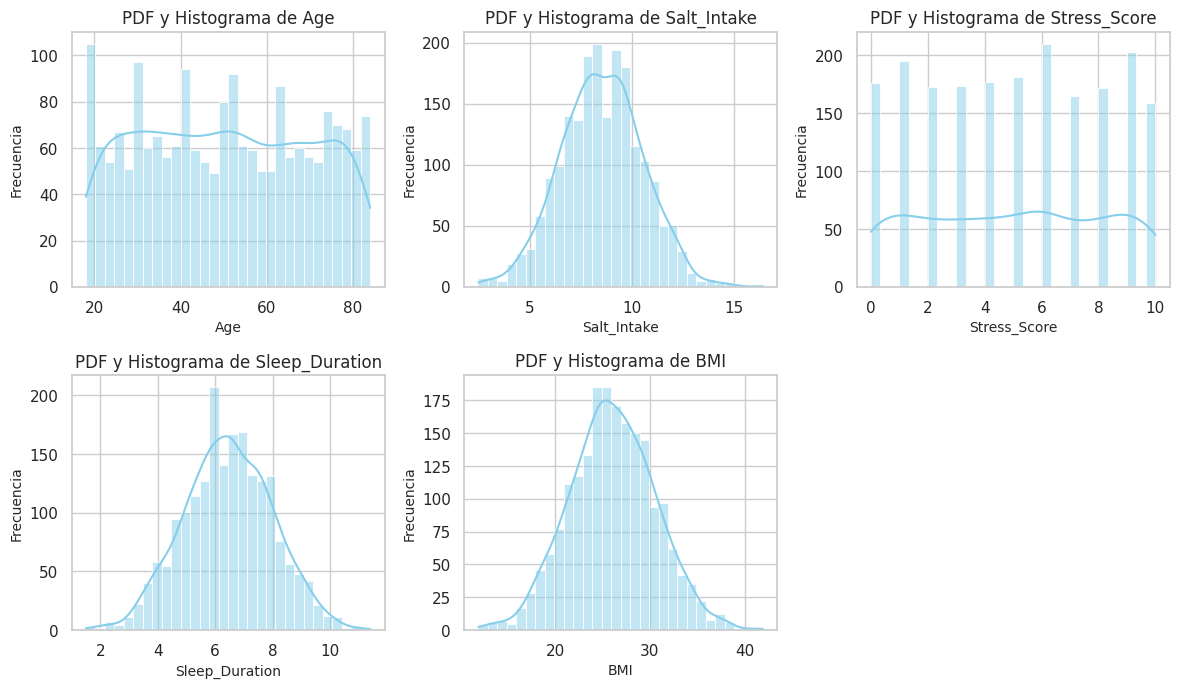

In [13]:
# Crear una lista de las columnas del dataset
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

##Conclusion del histograma y PDF
###Age
*	La distribución parece asimétrica, con una mayor concentración de personas entre los 30 y 50 años.
*	Hay menos personas en los extremos (menores de 30 y mayores de 60).

###Salt_Intake
* Esta columna parece tener una distribución casi normal, con la mayoría de la ingesta de sal teniendo un valor intermedio en los gramos
###Stress_score
* Hay una concentración alta de personas con puntuaciones entre 6 y 8, lo que sugiere que la mayoría tiene niveles de estrés moderados a altos.
* La distribución parece asimétrica hacia la derecha, con menos personas en los extremos bajos (0–2) y altos (9–10).
###Sleep_duration
* Frecuencia máxima: Alrededor de las 6 horas, lo que indica que la mayoría de las personas en el dataset duermen aproximadamente esa cantidad.
* La distribución parece asimétrica hacia la izquierda, lo que sugiere que hay menos personas durmiendo menos de 5 horas, y también menos durmiendo más de 8.
###BMI
* La curva PDF muestra una concentración entre 22 y 28, lo que indica que la mayoría está en el rango de peso normal a sobrepeso leve.
###Conclusiones generales
* La mayoría de las personas del estudio duermen menos de lo recomendado que son 8 horas diarias
* La mayoría de las personas están en su BMI normal
* Y hay personas concentradas en los niveles altos de estres

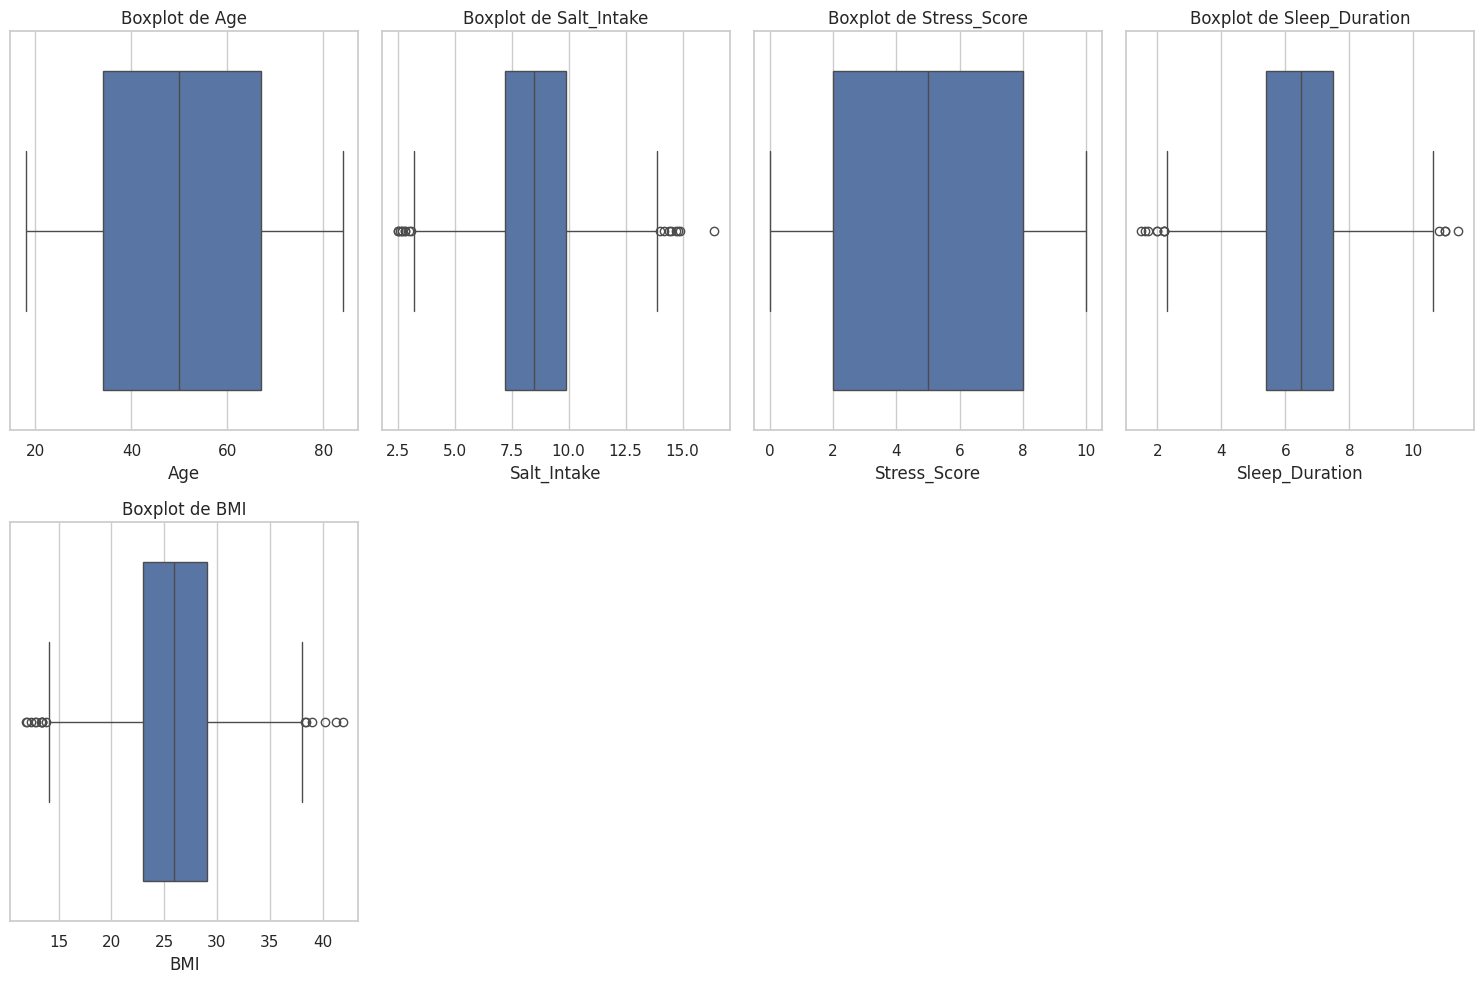

In [14]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

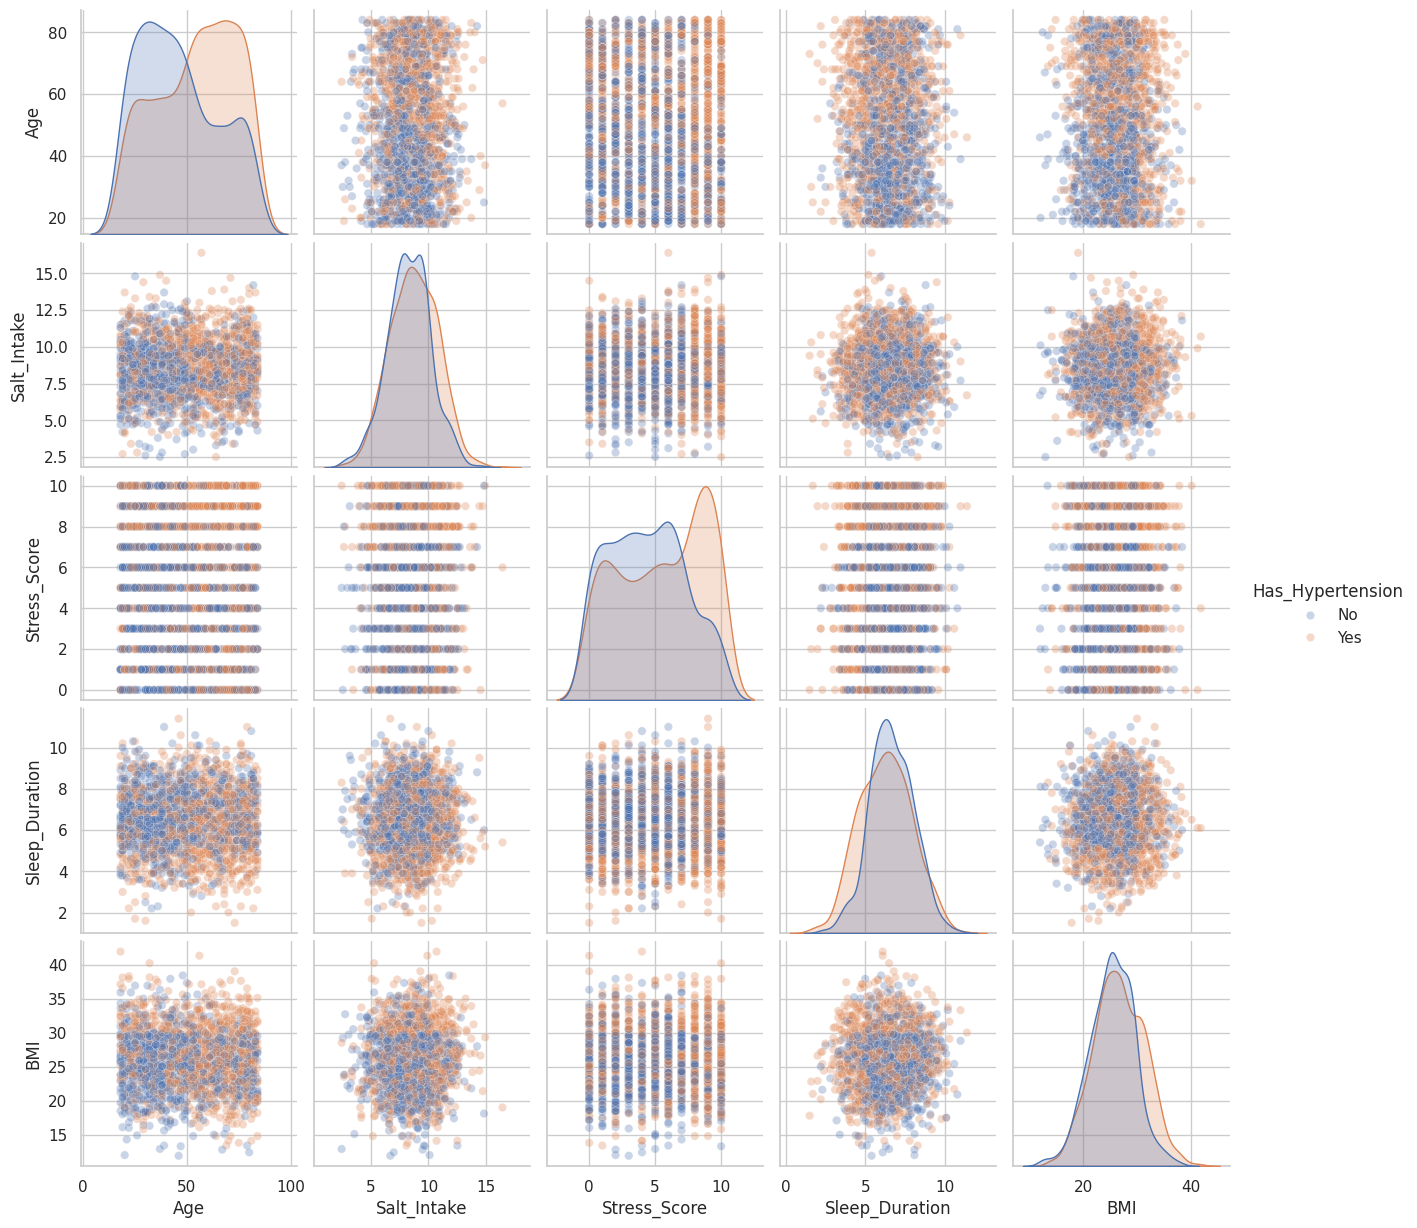

In [29]:
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Add the 'Has_Hypertension' column to the list of columns for the pairplot
plot_cols = numerical_cols + ['Has_Hypertension']

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df[plot_cols], plot_kws={'alpha': 0.3}, hue='Has_Hypertension', diag_kind='kde')

# Mostrar el gráfico
plt.show()

/tmp/ipython-input-164278594.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP_History', data=df, palette='viridis')
/tmp/ipython-input-164278594.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medication', data=df, palette='magma')
/tmp/ipython-input-164278594.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_History', data=df, palette='plasma')
/tmp/ipython-input-164278594.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

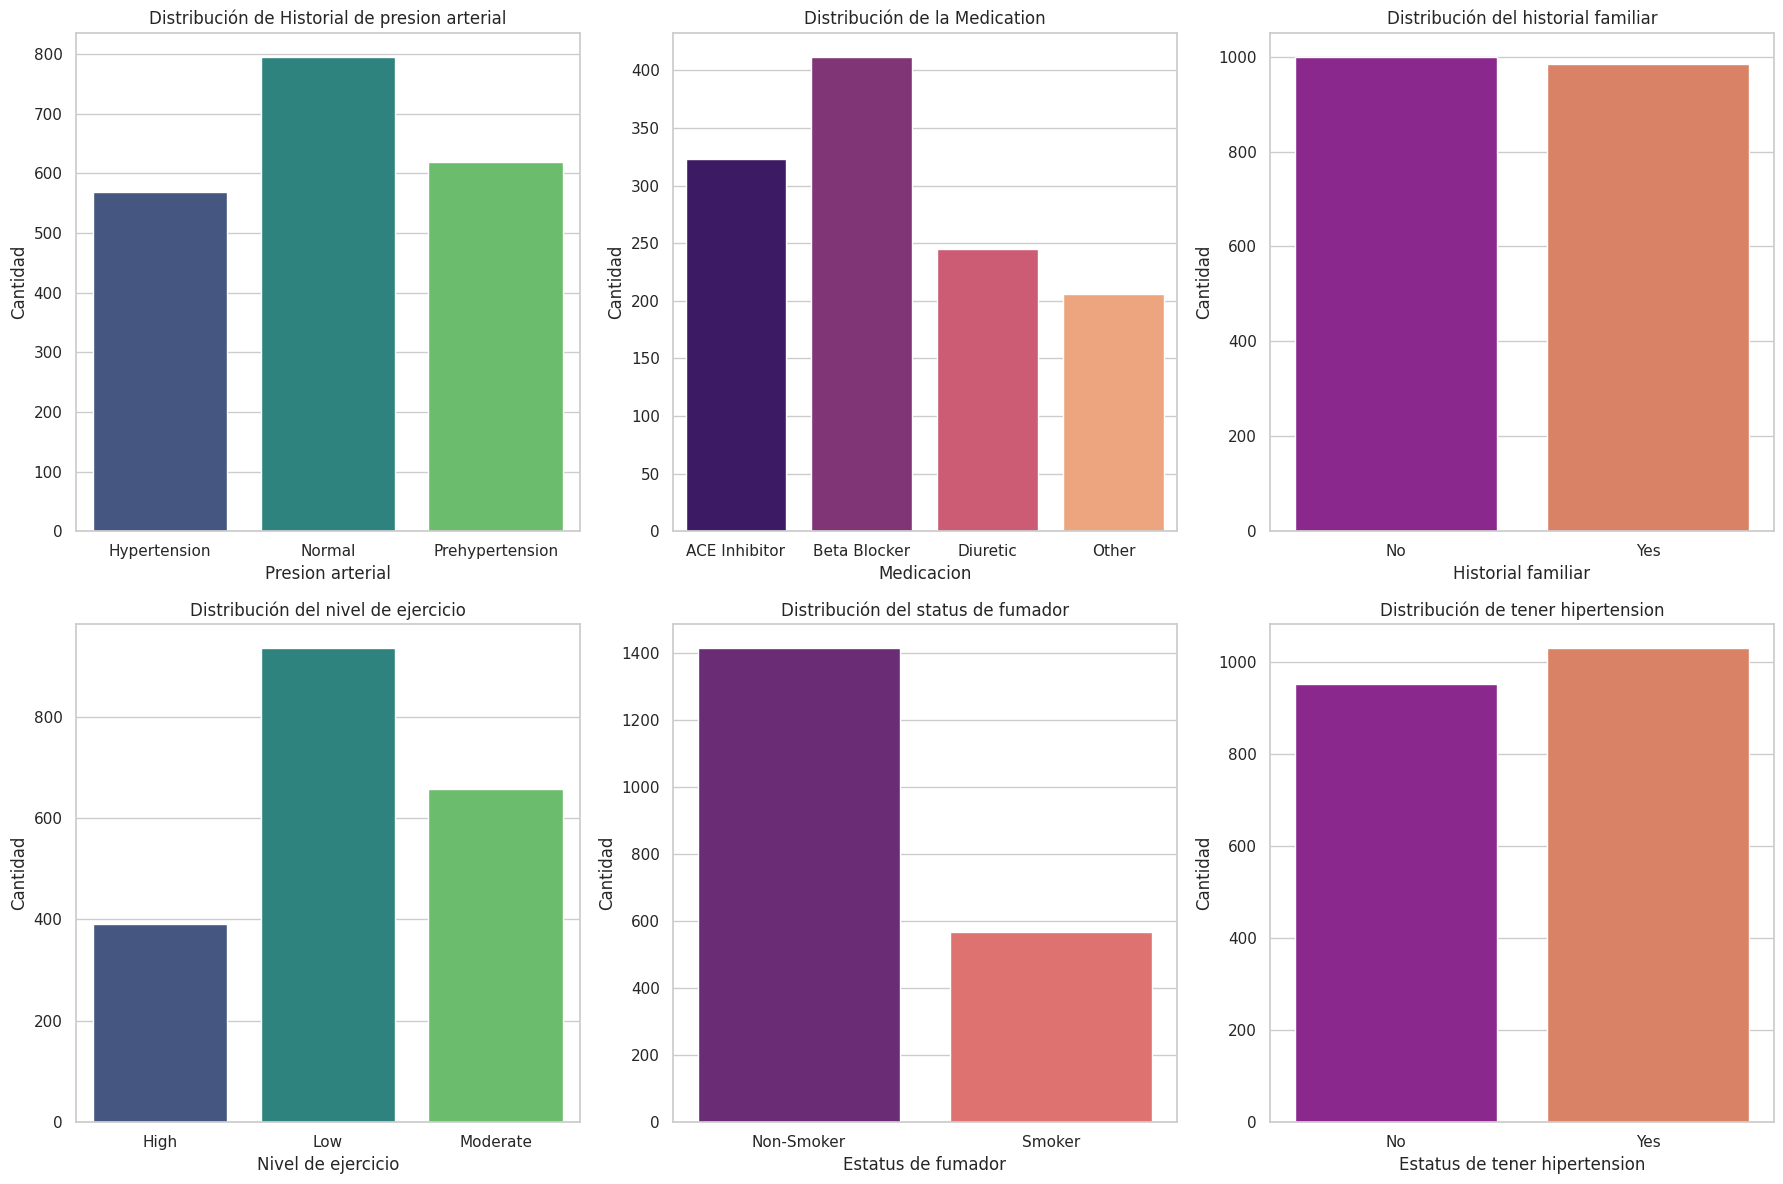

In [20]:
#Grafica de Barras para los datos categoricos

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficas de barras para cada variable categórica
plt.figure(figsize=(18, 12)) # Increased the figure size to accommodate two rows

# Gráfica de barras para 'BP_History'
plt.subplot(2, 3, 1) # Changed to 2 rows, 3 columns
sns.countplot(x='BP_History', data=df, palette='viridis')
plt.title('Distribución de Historial de presion arterial')
plt.xlabel('Presion arterial')
plt.ylabel('Cantidad')

# Gráfica de barras para 'Medication'
plt.subplot(2, 3, 2) # Changed to 2 rows, 3 columns
sns.countplot(x='Medication', data=df, palette='magma')
plt.title('Distribución de la Medication')
plt.xlabel('Medicacion')
plt.ylabel('Cantidad')

# Gráfica de barras para 'Family_History'
plt.subplot(2, 3, 3) # Changed to 2 rows, 3 columns
sns.countplot(x='Family_History', data=df, palette='plasma')
plt.title('Distribución del historial familiar')
plt.xlabel('Historial familiar')
plt.ylabel('Cantidad')

# Gráfica de barras para 'Exercise_Level'
plt.subplot(2, 3, 4) # Changed to 2 rows, 3 columns, plot number 4
sns.countplot(x='Exercise_Level', data=df, palette='viridis')
plt.title('Distribución del nivel de ejercicio')
plt.xlabel('Nivel de ejercicio')
plt.ylabel('Cantidad')

# Gráfica de barras para 'Smoking_Status'
plt.subplot(2, 3, 5) # Changed to 2 rows, 3 columns, plot number 5
sns.countplot(x='Smoking_Status', data=df, palette='magma')
plt.title('Distribución del status de fumador')
plt.xlabel('Estatus de fumador')
plt.ylabel('Cantidad')

# Gráfica de barras para 'Has_Hypertension'
plt.subplot(2, 3, 6) # Changed to 2 rows, 3 columns, plot number 6
sns.countplot(x='Has_Hypertension', data=df, palette='plasma')
plt.title('Distribución de tener hipertension')
plt.xlabel('Estatus de tener hipertension')
plt.ylabel('Cantidad')

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

Matriz de correlación:
                     Age  Salt_Intake  Stress_Score  Sleep_Duration       BMI
Age             1.000000     0.011205     -0.032184       -0.011839 -0.023498
Salt_Intake     0.011205     1.000000      0.008129        0.020394  0.039530
Stress_Score   -0.032184     0.008129      1.000000        0.021191  0.011450
Sleep_Duration -0.011839     0.020394      0.021191        1.000000  0.025476
BMI            -0.023498     0.039530      0.011450        0.025476  1.000000


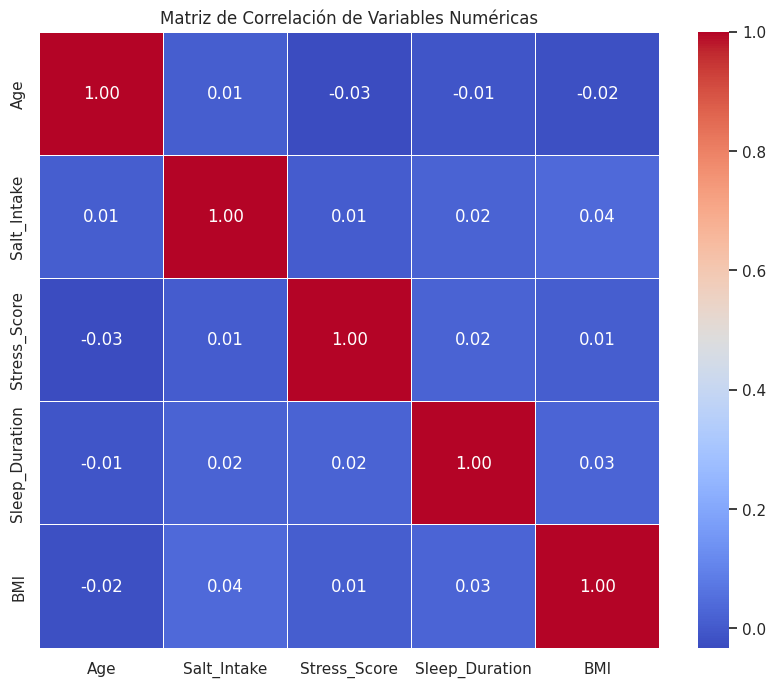

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados


# **7. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras